<IPython.core.display.Javascript object>


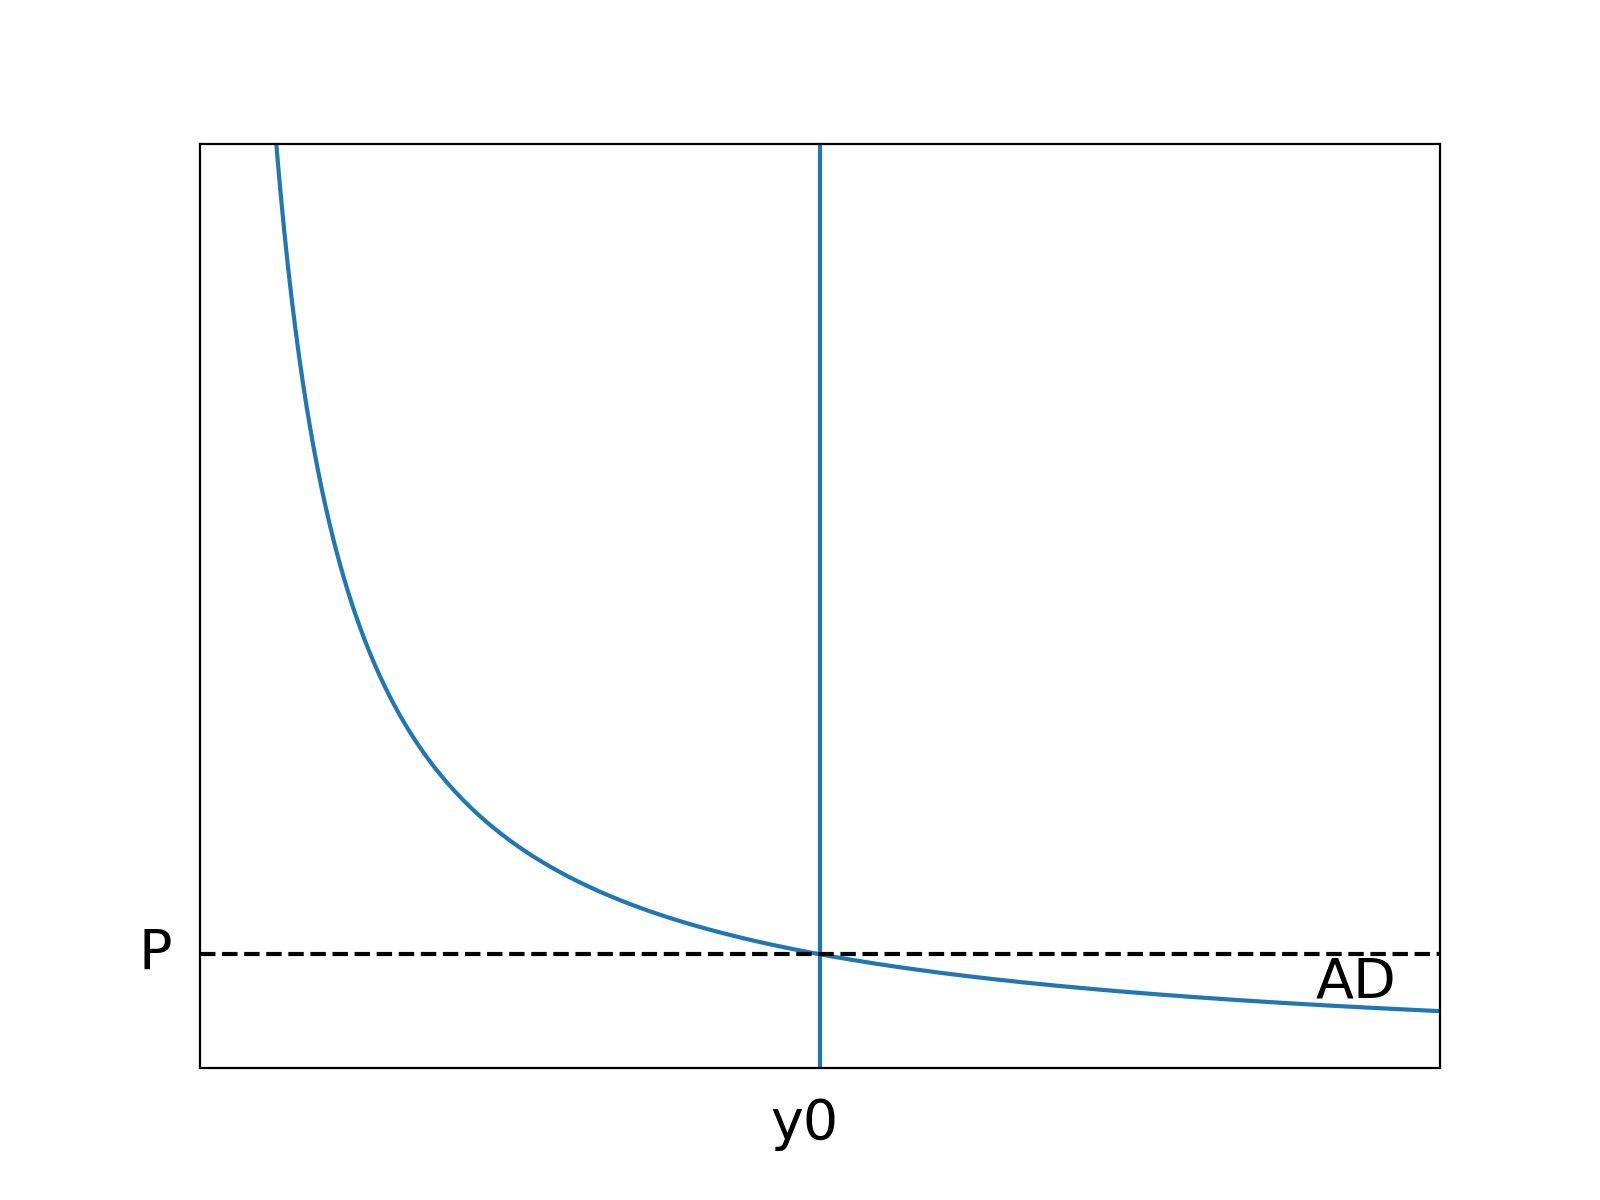

interactive(children=(Output(),), _dom_classes=('widget-interact',))

In [289]:
%matplotlib notebook
import ipywidgets as ipw 
import numpy as np
import matplotlib.pyplot as plt


def update():
    self.AD.set_ydata(self.M * self.V / self.y)
    self.LRAS.set_xdata(self.y0)
    x_int, y_int = self.get_intersect(self.AD, self.LRAS, line2_vert = True)
    self.h_line_intersect.set_ydata(y_int)
    self.AD_text.set_position((900, self.AD.get_ydata()[900] + self.text_vert_shift))
    self.P_text.set_position((-50, y_int + self.text_vert_shift * -2))
    self.y0_text.set_position((self.LRAS.get_xdata(orig=False)[0] - self.text_horiz_shift * 2,-10))
    self.fig.canvas.draw_idle()

plt.rcParams["font.size"] = 20
fig, ax = plt.subplots(1, figsize = (8, 6))
ax.set_ylim(0, 130)
ax.set_xlim(0, 1000)
plt.xticks([])
plt.yticks([])

M = 10 ** 3
V = 8

y = np.linspace(1, M, M)
y0 = 10 ** 2 * 5

AD, = ax.plot(y, M * V / y)
LRAS = ax.axvline(y0)

x_int, y_int = get_intersect(AD, LRAS, line2_vert = True)
h_line_intersect = ax.axhline(y_int, xmin = 0, xmax = x_int, 
                              ls = "--", color = "k")

text_vert_shift = 1
text_horiz_shift = 20
P_text = ax.text(-50, y_int, "P")
AD_text = ax.text(900, AD.get_ydata()[900] + text_vert_shift * -2, "AD")
y0_text = ax.text(LRAS.get_xdata(orig=False)[0] - text_horiz_shift * 2, -10, "y0")
ipw.interact(update, 
             M = ipw.widgets.IntSlider(value=self.M,
               min=self.M / 4,
               max=self.M * 2,
               step=10),
            V = ipw.widgets.FloatSlider(value = self.V * 1.5,
                min= self.V / 4,
                max = self.V * 2,
                step = .1),
            y0 = ipw.widgets.IntSlider(values = self.y0,
                min = self.y0 / 2,
                max = self.y0 * 2,
                step = 5))
        
    def get_intersect(self, line1, line2, line2_vert = False):
        if line2_vert == False:
            x = np.argwhere(np.diff(np.sign(line1 - line2))).flatten()
        else:
            line1_data = line1.get_data()
            # set orig = False or else list reads as float
            line2_xdata = line2.get_xdata(orig=False)[0]
            dist = [np.abs(i - line2_xdata) for i in line1_data[0]]
            min_dist = min(dist)
            x = dist.index(min_dist)
            y = line1_data[1][x]

        return x, y




plot = livePlot()
